<a href="https://colab.research.google.com/github/JoseLuis96001/MachineLearningExamples/blob/main/ML2_Regression_W1_Computing_Regression_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**We have de following data**

In [2]:
x=np.array([0,1,2,3,4])
y=np.array([1,3,7,13,21])

In [3]:
x,y

(array([0, 1, 2, 3, 4]), array([ 1,  3,  7, 13, 21]))

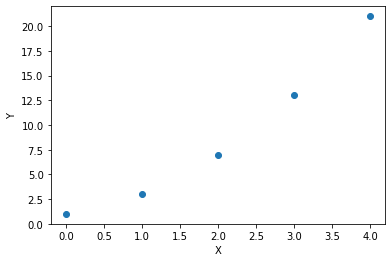

In [4]:
plt.plot(x,y,'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

If we want the **line** that **'best fits'** this dataset. We can calculate the **Residual Sum of squares** and try to **minimize** this function.

#**One Aproach** is to Set the gradient equal to zero

$$ 
\operatorname{RSS}\left(w_{0}, w_{1}\right)=\sum_{i=1}^{N}\left(y_{i}-\left[w_{0}+w_{1} x_{i}\right]\right)^{2} 
$$

$$ 
\nabla \operatorname{RSS}\left(w_{0}, w_{1}\right)=\left[\begin{array}{c} 
-2 \sum_{i=1}^{N}\left[y_{i}-\left(w_{0}+w_{1} x_{i}\right)\right] \\ 
-2 \sum_{i=1}^{N}\left[y_{i}-\left(w_{0}+w_{1} x_{i}\right)\right] x_{i} 
\end{array}\right] 
$$

Setting $\nabla \operatorname{RSS}\left(w_{0}, w_{1}\right) = 0$ , I have the following:

$$ 
\begin{array}{l} 
\hat{\omega}_{0}=\frac{\sum_{i=1}^{N} y_{i}}{N}-\hat{w}_{1} \frac{\sum_{i=1}^{N} x_{i}}{N}\\ 
\sum_{y_{i} x_{i}}-\hat{\omega}_{0} \sum x_{i}-\hat{w_{1}} \sum x_{i}^{2}=0\\ 
\hat{\omega}_{1}=\frac{\sum_{y_{i} x_{i}}-\frac{\sum y_{i} \sum x_{i}}{N}}{\sum x_{i}^{2}-\frac{\sum_{x i} \sum_{x i}}{N}} 
\end{array} 
$$

We have a closed form solution that involves the following terms:

*   The number of data points (N)
*   The sum (or mean) of the Ys
*   The sum (or mean) of the Xs
*   The sum (or mean) of the product of the Xs and the Ys
*   The sum (or mean) of the Xs squared







# We first solve for the slope and then we use the value of the slope to solve for the intercept. 
The formula for the slope is a fraction with:

**Method 1:** (using sums)

In [7]:
N=len(x)

In [10]:
num_slope=(sum(x*y)-(1/N*sum(y)*sum(x)))
num_slope

50.0

In [11]:
den_slope=(sum(x*x)-(1/N*sum(x)*sum(x)))
den_slope

10.0

Hence:

In [12]:
slope=num_slope/den_slope
slope

5.0

**Method 2:** (using means) Dividing the numerator and denominator by N

In [13]:
num_slope=np.mean(x*y)-(np.mean(x)*np.mean(y))
print(num_slope)

10.0


In [14]:
den_slope=np.mean(x*x)-(np.mean(x)*np.mean(x))
den_slope

2.0

In [15]:
slope=num_slope/den_slope
slope

5.0

Using the slope in $\hat{\omega}_{0}$

In [16]:
intercept=np.mean(y)-slope*np.mean(x)
intercept

-1.0

**slope = 5, intercept = -1** 

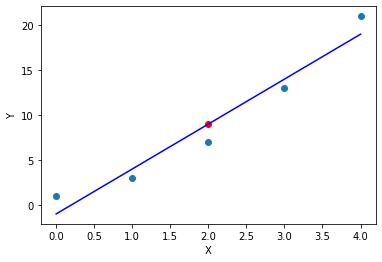

In [17]:
# Some dummy data
x = [0, 1, 2, 3, 4]


# Find the slope and intercept of the best fit line
#slope, intercept = np.polyfit(x, y, 1)

# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in x]

# Plot the best fit line over the actual values
plt.plot(x,y,'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(np.mean(x),np.mean(y) , 'ro')
plt.plot(x, abline_values, 'b')
plt.show()

The solid red point included in this plot is the point (mean of X, mean of Y).  You’ll notice that this point falls exactly on the regression line! 

(Food for thought: is this always true? Hint: try plugging in (mean of X) as input into prediction = intercept + slope * input) where you use the formula for intercept). 



In [18]:
np.mean(y)

9.0

In [19]:
predicted_v1=intercept+slope*np.mean(x)
predicted_v1

9.0

#**Other Aproach** is using the gradient descent (iteratively)

We will use the same x and y 

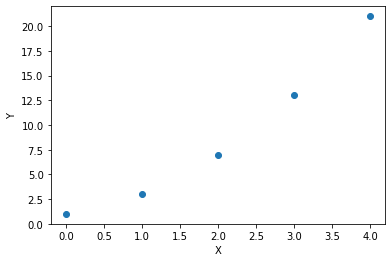

In [5]:
plt.plot(x,y,'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

We need to remember that:


*   The derivative of the cost for the intercept is the sum of the errors
*   The derivative of the cost for the slope is the sum of the product of the errors and the input



$$ 
\nabla \operatorname{RSS}\left(w_{0}, w_{1}\right)=\left[\begin{array}{c} 
-2 \sum_{i=1}^{N}\left[y_{i}-\left(w_{0}+w_{1} x_{i}\right)\right] \\ 
-2 \sum_{i=1}^{N}\left[y_{i}-\left(w_{0}+w_{1} x_{i}\right)\right] x_{i} 
\end{array}\right] 
$$

We will need a starting value for the slope and intercept, a step_size and a tolerance

initial_intercept = 0

initial_slope = 0

step_size = -0.05

tolerance = 0.01

The algorithm
In each step of the gradient descent we will do the following:

1. Compute the predicted values given the current slope and intercept

2. Compute the prediction errors (Y-prediction)

3. Update the intercept:

  compute the derivative: sum(errors)

  compute the adjustment as step_size times the derivative

  decrease the intercept by the adjustment
4. Update the slope:

  compute the derivative: sum(errors*input)

  compute the adjustment as step_size times the derivative

  decrease the slope by the adjustment
5. Compute the magnitude of the gradient

6. Check for convergence

In [50]:
Intercept = 0 
Slope = 0
step = -0.05
tolerance = 0.01

1. We calculate the predictions

In [51]:
predictions=np.zeros(N)

In [52]:
def pred(Intercept,Slope):
  global predictions
  global x
  for i in range(N):
    predictions[i]=(Intercept+Slope*x[i])

In [53]:
pred(Intercept,Slope)

In [54]:
count=0
magnitude=100
while magnitude > tolerance:
  pred(Intercept,Slope)
  #updating intercept
  errors=y-predictions
  sum1=sum(errors)
  adjustmen=step*sum1
  Intercept=Intercept-1*adjustmen
  #updating slope
  sum2=sum(x*errors)
  adjustmen2=step*sum2
  Slope=Slope-1*adjustmen2
  magnitude=np.sqrt(sum1*sum1+sum2*sum2)
  count=count+1
print("Intercept: ",Intercept)
print("Slope: ",Slope)
print("No Interation: ",count)


Intercept:  -0.9942069818917416
Slope:  4.997967918970868
No Interation:  78
